#**Plays Store App Analysis**

##**Data Loadind in Google Colab**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data=pd.read_csv('googleplaystore.csv')

##**Basic Statistics**

In [61]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [104]:
data.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10358.000000,1.035700e+04,8831.000000,1.035800e+04,9592.0,10357
mean,4.205165,4.059046e+05,21.287788,1.415639e+07,0.0,2017-11-14 09:25:19.320266496
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.0,2010-05-21 00:00:00
25%,4.100000,3.200000e+01,4.700000,1.000000e+03,0.0,2017-09-03 00:00:00
50%,4.300000,1.680000e+03,13.000000,1.000000e+05,0.0,2018-05-20 00:00:00
75%,4.500000,4.641600e+04,29.000000,1.000000e+06,0.0,2018-07-19 00:00:00
max,19.000000,7.815831e+07,100.000000,1.000000e+09,0.0,2018-08-08 00:00:00
std,0.506868,2.696778e+06,22.540247,8.023580e+07,0.0,NaN


In [105]:
data.shape

(10358, 14)

#**Data CLeaning**

In [62]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [63]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [64]:
 #Fill missing values in 'Type', 'Content Rating', 'Current Ver', 'Android Ver' using mode
for column in ['Type', 'Content Rating', 'Current Ver', 'Android Ver']:
    data[column] = data[column].fillna(data[column].mode()[0])


In [65]:
data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [66]:
print(data[['Reviews', 'Size', 'Installs', 'Price']].head())

  Reviews  Size     Installs Price
0     159   19M      10,000+     0
1     967   14M     500,000+     0
2   87510  8.7M   5,000,000+     0
3  215644   25M  50,000,000+     0
4     967  2.8M     100,000+     0


In [67]:
#Convert 'Reviews' to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [68]:
#Normalize 'Size'
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) * 0.001
    else:
        return None

data['Size'] = data['Size'].apply(convert_size)

In [69]:
 #Clean 'Installs'
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').fillna(0) # Convert to numeric, replace errors with NaN, then fill NaN with 0
data['Installs'] = data['Installs'].astype(int) # Convert to integer


In [70]:
# Clean 'Price'
data['Price'] = data['Price'].str.replace('$', '', regex=True) # Remove '$'
data['Price'] = pd.to_numeric(data['Price'], errors='coerce') # Convert to numeric, handling errors
data['Price'] = data['Price'].astype(float) # Convert to float

In [71]:
print(data[['Reviews', 'Size', 'Installs', 'Price']].head())

    Reviews  Size  Installs  Price
0     159.0  19.0     10000    0.0
1     967.0  14.0    500000    0.0
2   87510.0   8.7   5000000    0.0
3  215644.0  25.0  50000000    0.0
4     967.0   2.8    100000    0.0


In [72]:
# 1. Convert 'Last Updated' to datetime
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

In [73]:
data.drop_duplicates(inplace=True)

In [74]:
data.drop('Current Ver', axis=1, inplace=True)

In [75]:
# Replace missing values with the mode
android_mode = data['Android Ver'].mode()[0]
data['Android Ver'] = data['Android Ver'].fillna(android_mode)

In [76]:
#Optionally, extract the major Android version
def extract_major_version(version):
    if isinstance(version, str):
        return version.split(' ')[0]  # Get the first part of the version (e.g., "4.0.3")
    return version

data['Android Major Ver'] = data['Android Ver'].apply(extract_major_version)

In [77]:
data['Category'] = data['Category'].str.strip().str.title()  # Strip whitespace and apply proper casing


In [78]:
# Handle missing values in 'Type'
data['Type'] = data['Type'].fillna(data['Type'].mode()[0])  # Fill with mode
data['Type'] = data['Type'].str.strip().str.capitalize()  # Ensure consistent formatting


In [79]:
data['Content Rating'] = data['Content Rating'].fillna(data['Content Rating'].mode()[0])  # Fill with mode
data['Content Rating'] = data['Content Rating'].str.strip().str.title()

In [80]:
data['Content Rating'] = data['Content Rating'].replace({'Adults only 18+': 'Mature'})


In [81]:
data['Genres'] = data['Genres'].str.strip().str.title()

In [82]:
data['Primary Genre'] = data['Genres'].str.split(';').str[0]


In [83]:
# Save the cleaned dataset (optional)
data.to_csv('/content/cleaned_googleplaystore.csv', index=False)

#**Top 10 Apps by Installs**

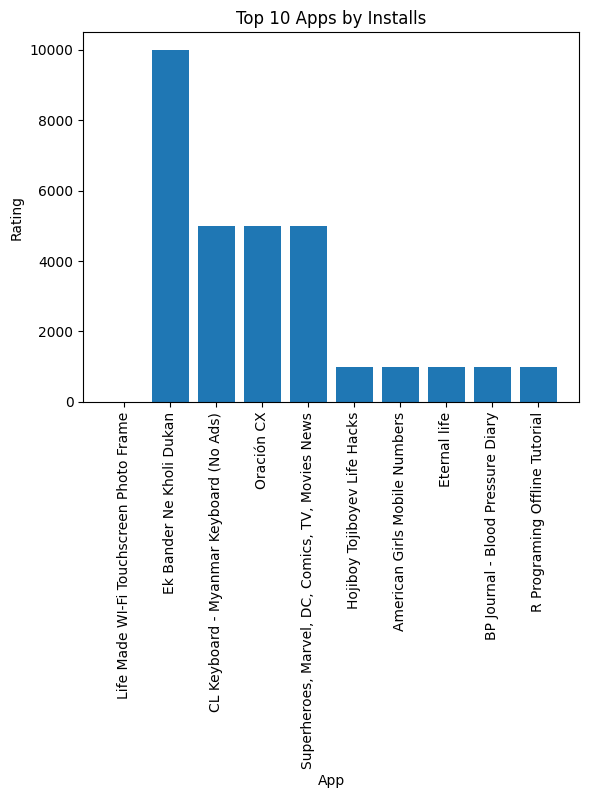

In [88]:
top_apps_rating = data.sort_values(by=['Rating', 'Installs'], ascending=[False, False]).head(10)

# Now you can plot
plt.bar(top_apps_rating['App'], top_apps_rating['Installs'])
plt.xlabel('App')
plt.ylabel('Rating')  # Assuming the y-axis represents rating
plt.title('Top 10 Apps by Installs')  # Assuming the title is still correct
plt.xticks(rotation=90)
plt.show()

#**Top 5 Categories by Average Rating**

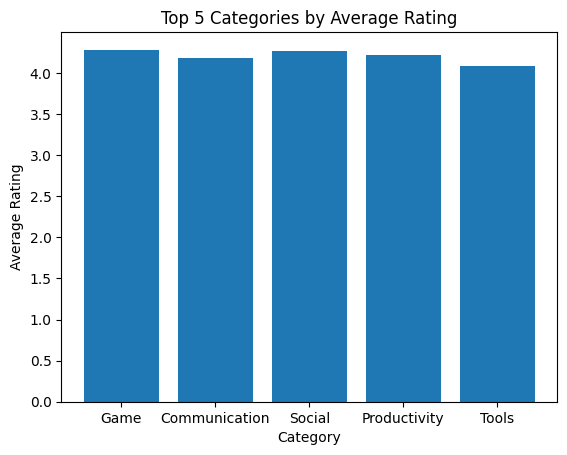

In [90]:
category_success = data.groupby('Category').agg({'Rating': 'mean', 'Installs': 'sum'})
category_success = category_success.sort_values(by=['Installs', 'Rating'], ascending=False).head(5)


plt.bar(category_success.index, category_success['Rating'])
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Top 5 Categories by Average Rating')
plt.show()

#**Installations Catagorys Wise**

In [91]:
top_categories_by_installs = data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_categories_by_installs

,Installs
Category,
Game,31544024415
Communication,24152276251
Social,12513867902
Productivity,12463091369
Tools,11452771915
Family,10041692505
Photography,9721247655
Travel_And_Local,6361887146
Video_Players,6222002720


#**Distribution of App Installs**

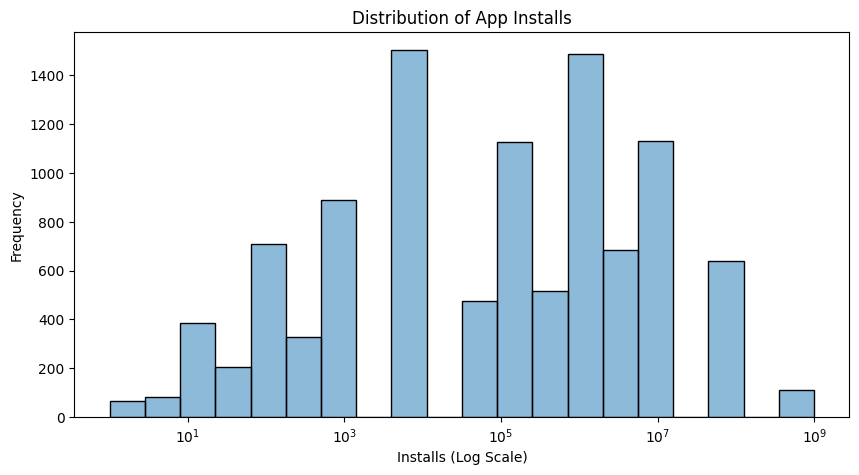

In [93]:
if data['Installs'].dtype == 'object':
    data['Installs'] = pd.to_numeric(data['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')

plt.figure(figsize=(10, 5))
sns.histplot(data['Installs'], bins=20, kde=True, log_scale=True)
plt.title('Distribution of App Installs')
plt.xlabel('Installs (Log Scale)')
plt.ylabel('Frequency')
plt.show()

In [97]:
top_categories_by_installs = data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_categories_by_installs

,Installs
Category,
Game,31544024415
Communication,24152276251
Social,12513867902
Productivity,12463091369
Tools,11452771915
Family,10041692505
Photography,9721247655
Travel_And_Local,6361887146
Video_Players,6222002720


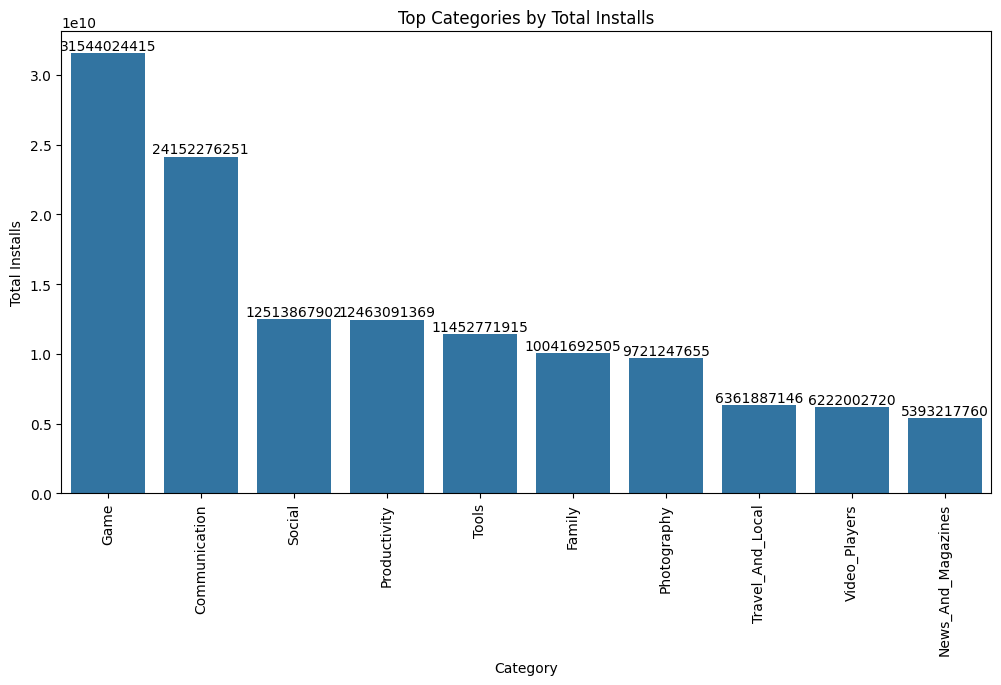

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories_by_installs.index, y=top_categories_by_installs.values)
plt.title('Top Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
for i, v in enumerate(top_categories_by_installs.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

In [99]:
paid_apps_by_category = data[data['Type'] == 'Paid'].groupby('Category').size().sort_values(ascending=False).head(5)
paid_apps_by_category

,0
Category,
Family,187
Medical,84
Game,83
Personalization,82
Tools,78


#**Top 5 Categories with the Most Paid Apps**

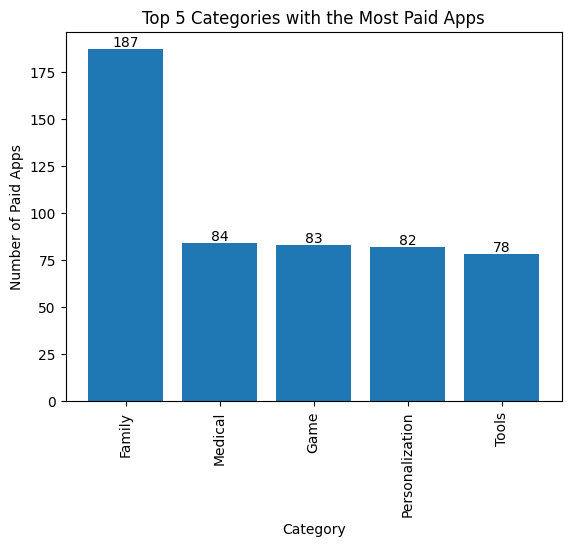

In [100]:
plt.bar(paid_apps_by_category.index, paid_apps_by_category.values)
plt.xlabel('Category')
plt.ylabel('Number of Paid Apps')
plt.title('Top 5 Categories with the Most Paid Apps')
for i, v in enumerate(paid_apps_by_category.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

In [101]:
latest_apps_by_installs = data.sort_values(by=['Last Updated', 'Installs'], ascending=[False, False]).head(5)
latest_apps_by_installs[['App', 'Last Updated', 'Installs']]

,App,Last Updated,Installs
10408,Shoot Hunter-Gun Killer,2018-08-08,50000000
10712,Lalafo Pulsuz Elanlar,2018-08-08,1000000
10209,Video Downloader For FB: Save FB Videos 2018,2018-08-08,50000
10718,BankNordik,2018-08-08,5000
10760,Fast Tract Diet,2018-08-08,1000


#**Top 5 Latest Apps by Installs**

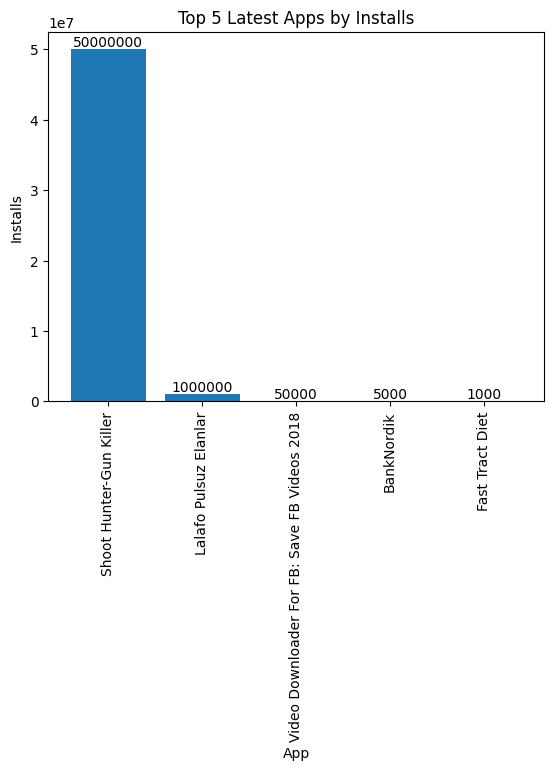

In [102]:
plt.bar(latest_apps_by_installs['App'], latest_apps_by_installs['Installs'])
plt.xlabel('App')
plt.ylabel('Installs')
plt.title('Top 5 Latest Apps by Installs')
for i, v in enumerate(latest_apps_by_installs['Installs']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()